## Simulations Gaussiennes

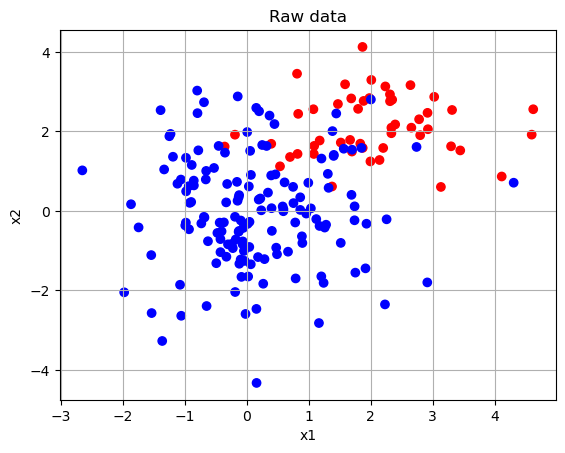

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap

mycolormap = ListedColormap(['#FF0000', '#0000FF'])

Exchoice = 1  # Choisir l'exemple

##############################################
# Data set generation using scipy.stats.multivariate_normal
#############################################

def generate_data(n1, n2, mu1, cov1, mu2, cov2):
    """
    Generates simulated data from two multivariate normal distributions.

    Parameters:
    - n1: Size of sample 1
    - n2: Size of sample 2
    - mu1: Mean vector for group 1 (in 2 dimensions)
    - cov1: Covariance matrix for group 1 (in 2 dimensions)
    - mu2: Mean vector for group 2 (in 2 dimensions)
    - cov2: Covariance matrix for group 2 (in 2 dimensions)
    
    Returns:
    - X: Concatenated data matrix for both groups (n1 + n2, 2)
    - Y: Associated class vector (0 for group 1, 1 for group 2)
    """
    # Generate data for each group
    xG1 = multivariate_normal(mean=mu1, cov=cov1).rvs(n1)
    xG2 = multivariate_normal(mean=mu2, cov=cov2).rvs(n2)
    
    # Concatenate data from both groups
    X = np.concatenate((xG1, xG2), axis=0)
    
    # Create class vector (labels)
    Y = np.array([0] * n1 + [1] * n2)
    
    return X, Y

n1, n2 = 50, 150
mu1 = [2, 2]  # Moyenne G1
cov1 = [[1, 0], [0, 1]]  # Matrice de covariance G1 (indépendance)
    
mu2 = [0, 0]  # Moyenne G2
cov2 = [[1, 0], [0, 2]]  # Matrice de covariance G2 (indépendance mais variance différente)
    
X, Y = generate_data(n1, n2, mu1, cov1, mu2, cov2)


# Visualisation des données générées
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=mycolormap)
plt.title('Raw data')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()





## Simulation de l'exemple 2 (gaussiennes côte-côte) puis affichage de la posterior

 - $P(X = x \mid Y = 1)$ est une gaussienne bivariée avec une moyenne $\mu_1 = (\mu_{11}, \mu_{12})$ et une matrice de covariance $\Sigma_1$.

 - La densité a posteriori $P(Y = 1 \mid X = x)$ peut être calculée à l'aide du théorème de Bayes :

      $$
      P(Y = 1 \mid X = x) = \frac{P(X = x \mid Y = 1) P(Y = 1)}{P(X = x)}
      $$

      où :

      $$
      P(X = x) = P(X = x \mid Y = 1) P(Y = 1) + P(X = x \mid Y = 0) P(Y = 0)
      $$

      Cela permet de calculer la probabilité a posteriori en fonction des probabilités conditionnelles et des probabilités a priori.


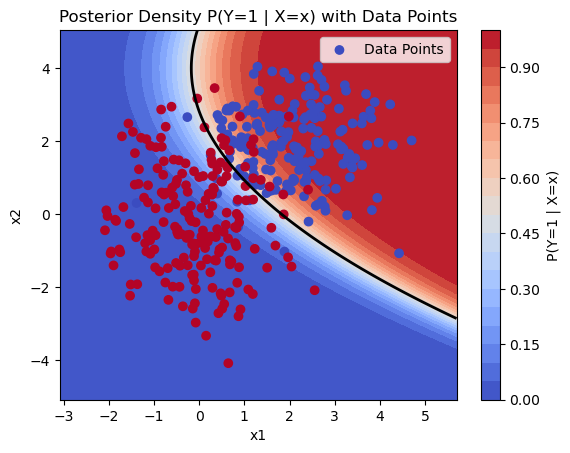

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

class Bayes_Classifier:
    def __init__(self, mu1, cov1, mu2, cov2, p1=0.5):
        """
        Initializes the Bayes Classifier with parameters of two bivariate Gaussian distributions.

        Parameters:
        - mu1: Mean vector for class 1 (in 2 dimensions)
        - cov1: Covariance matrix for class 1 (in 2 dimensions)
        - mu2: Mean vector for class 0 (in 2 dimensions)
        - cov2: Covariance matrix for class 0 (in 2 dimensions)
        - p1: Prior probability of class 1 (default is 0.5)
        """
        self.mu1 = mu1
        self.cov1 = cov1
        self.mu2 = mu2
        self.cov2 = cov2
        self.p1 = p1
        self.p2 = 1 - p1
        self.rv1 = multivariate_normal(mu1, cov1, allow_singular=True)
        self.rv2 = multivariate_normal(mu2, cov2, allow_singular=True)

    def predict_proba(self, X):
        """
        Predicts the posterior probability of class 1 for the given data points.

        Parameters:
        - X: Data points (n_samples, 2)

        Returns:
        - p1_x: Posterior probability of class 1 for each data point
        """
        # Calculate likelihoods P(X | Y=1) and P(X | Y=0)
        px_1 = self.rv1.pdf(X)
        px_2 = self.rv2.pdf(X)

        # Total density P(X=x)
        px = px_1 * self.p1 + px_2 * self.p2

        # Posterior probability P(Y=1 | X=x) using Bayes' theorem
        p1_x = (px_1 * self.p1) / px

        return p1_x


def display_posterior_density(X, Y, classifier):
    """
    Displays the posterior density P(Y=1 | X=x) using a contour plot.

    Parameters:
    - X: Data points (n_samples, 2)
    - Y: Class labels (n_samples,)
    - classifier: Bayes_Classifier object used to predict the posterior probability
    """
        # Define the grid for evaluating the posterior probability
    min_x1, min_x2 = np.min(X, axis=0) - 1
    max_x1, max_x2 = np.max(X, axis=0) + 1

    # Generate a grid of 2D points (mesh)
    x1, x2 = np.mgrid[min_x1:max_x1:.01, min_x2:max_x2:.01]
    pos = np.dstack((x1, x2))

    # Predict posterior probability of first class for each point in the grid
    p1_x = classifier.predict_proba(pos.reshape(-1, 2))
    if p1_x.ndim > 1 and p1_x.shape[1]>1:
        p1_x=p1_x[:,0]

    p1_x=p1_x.reshape(x1.shape)      

    # Display the posterior density in 2D
    plt.contourf(x1, x2, p1_x, levels=20, cmap='coolwarm')
    plt.colorbar(label='P(Y=1 | X=x)')
    plt.contour(x1, x2, p1_x, levels=[0.5], colors='black', linewidths=2)
    plt.title("Posterior Density P(Y=1 | X=x)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, cmap='coolwarm', label='Data Points')

    # Customize the plot
    plt.title("Posterior Density P(Y=1 | X=x) with Data Points")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
n1, n2 = 200, 200
mu1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
mu2 = [0, 0]
cov2 = [[1, 0], [0, 2]]

X, Y = generate_data(n1, n2, mu1, cov1, mu2, cov2)
classifier = Bayes_Classifier(mu1, cov1, mu2, cov2)

# Display posterior density
display_posterior_density(X, Y, classifier)

## Mon Classifieur de Bayes Naif

Classifieur de Bayes Naif

In [17]:
import numpy as np

class BayesNaifGaussien:
    def __init__(self):
        self.mu_0 = None  # Moyenne pour la classe 0
        self.mu_1 = None  # Moyenne pour la classe 1
        self.sigma_0 = None  # Variance pour la classe 0
        self.sigma_1 = None  # Variance pour la classe 1
        self.p_y0 = None  # Probabilité a priori de Y=0
        self.p_y1 = None  # Probabilité a priori de Y=1

    def fit(self, X, Y):
        """ Calcule les paramètres du modèle à partir des données X et Y """
        # Séparer les données selon les classes
        X_0 = X[Y == 0]  # Données pour la classe 0
        X_1 = X[Y == 1]  # Données pour la classe 1
        
        # Calculer les moyennes et variances pour chaque classe
        self.mu_0 = np.mean(X_0, axis=0)
        self.mu_1 = np.mean(X_1, axis=0)
        self.sigma_0 = np.var(X_0, axis=0)
        self.sigma_1 = np.var(X_1, axis=0)
        
        # Probabilités a priori P(Y=0) et P(Y=1)
        self.p_y0 = len(X_0) / len(X)
        self.p_y1 = len(X_1) / len(X)

    def gaussienne(self, x, mu, sigma):
        """ Calcul de la densité de probabilité gaussienne pour un point x """
        return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-0.5 * ((x - mu) ** 2) / sigma)

    def predict_proba(self, X):
        """ Calcule les probabilités a posteriori P(Y=1 | X) pour chaque individu dans X """
        proba_y1_given_x = []
        
        for x in X:
            # Calculer P(X | Y=1) et P(X | Y=0) pour chaque variable
            p_x_given_y1 = np.prod(self.gaussienne(x, self.mu_1, self.sigma_1))
            p_x_given_y0 = np.prod(self.gaussienne(x, self.mu_0, self.sigma_0))
            
            # Densité totale P(X=x)
            p_x = p_x_given_y1 * self.p_y1 + p_x_given_y0 * self.p_y0
            
            # Calculer la probabilité a posteriori P(Y=1 | X=x) (Théorème de Bayes)
            p_y1_x = (p_x_given_y1 * self.p_y1) / p_x
            
            # Ajouter la probabilité pour cet individu
            proba_y1_given_x.append(p_y1_x)
        
        return np.array(proba_y1_given_x)

    def predict(self, X):
        """ Prédit la classe (0 ou 1) pour chaque individu en fonction de P(Y=1 | X) """
        proba_y1 = self.predict_proba(X)
        return (proba_y1 >= 0.5).astype(int)

# Exemple d'utilisation :

# Générer des données aléatoires (2 variables)
#np.random.seed(42)
#X = np.random.randn(100, 2)  # 100 individus, 2 variables
#Y = np.random.choice([0, 1], size=100)  # Classes aléatoires 0 ou 1

# Initialiser et entraîner le modèle
model = BayesNaifGaussien()
model.fit(X, Y)

# Prédire les probabilités a posteriori P(Y=1 | X)
proba_y1_given_x = model.predict_proba(X)

# Afficher les probabilités et les paramètres du modèle
print("Probabilités P(Y=1 | X):", proba_y1_given_x)
print("Moyenne classe 0:", model.mu_0)
print("Moyenne classe 1:", model.mu_1)
print("Variance classe 0:", model.sigma_0)
print("Variance classe 1:", model.sigma_1)


# Afficher les performances
error=(model.predict(X)!=Y).sum()/len(Y)
print("Erreur empirique",error)


Probabilités P(Y=1 | X): [4.77129432e-02 1.88198612e-01 1.19806441e-02 1.61156057e-03
 7.57724865e-01 5.47979333e-03 2.86561102e-02 5.28354680e-03
 4.19710179e-03 2.32670361e-03 4.25351100e-05 2.75755452e-02
 1.66745301e-03 2.49435759e-01 1.00766811e-03 6.33178333e-02
 7.11726400e-02 8.06725044e-03 3.49788468e-02 2.33123217e-01
 1.85679153e-01 1.61388217e-02 4.73890955e-04 3.40903507e-03
 5.48351905e-02 6.11117153e-01 7.97042638e-04 2.39487337e-02
 1.81606673e-01 7.51506787e-01 1.44906911e-01 3.20614819e-03
 1.49182986e-02 2.36029577e-02 1.10421848e-03 4.06797993e-02
 2.76919459e-01 9.80876216e-03 1.51080835e-03 1.19535527e-02
 7.54920408e-02 2.37668468e-03 1.34267871e-01 1.50892025e-04
 2.82689122e-04 3.97560524e-01 1.85964298e-01 2.89790882e-02
 2.61032354e-01 4.09004267e-01 2.28426189e-04 2.69845210e-01
 6.10553550e-03 8.50242142e-01 2.03655676e-01 2.20047876e-02
 2.75311642e-02 9.77504492e-02 3.40259695e-01 3.73255885e-01
 1.52570034e-03 2.83882103e-01 1.47553228e-03 1.59946985e-02

## Erreur en apprentissage et test pour le classifieur de Bayes naïf

In [18]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=3)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB();
gnbmod=gnb.fit(X_train, y_train);
y_pred_test = gnbmod.predict(X_test)
y_pred_train = gnbmod.predict(X_train)

E_test=(y_test != y_pred_test).sum()/len(y_test)
E_train=(y_train != y_pred_train).sum()/len(y_train)

print("Error on the test set=",E_test)
print("Error on the train set=",E_train)


Error on the test set= 0.05970149253731343
Error on the train set= 0.07142857142857142


## Courbe ROC et AUC pour une validation en 5 plis

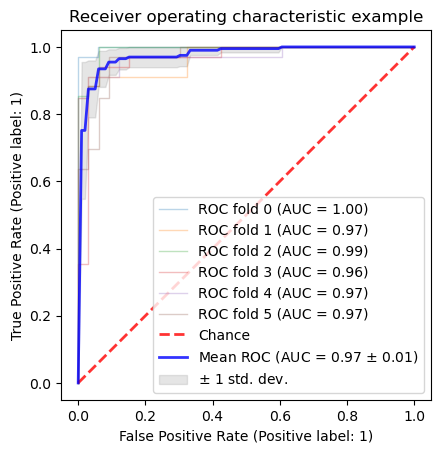

In [19]:
#Etude MM 2022
y=Y
#############################################
# Cross-validation sur la courbe ROC
############################################
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

n_samples, n_features = X.shape

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = GaussianNB();

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    y_train=[y[i] for i in train];
    y_test=[y[i] for i in test];
    classifier.fit(X[train], y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,             # Le modèle entraîné
        X[test],                # Les données de test
        y_test,                 # Les étiquettes de test
        name='ROC fold {}'.format(i),  # Nom de la courbe pour chaque fold
        alpha=0.3,              # Transparence
        lw=1,                   # Épaisseur de la ligne
        ax=ax                   # L'axe de la figure pour tracer la courbe
        )       
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
    


## Analyse discriminante linéaire

LDA Classification Accuracy: 0.93


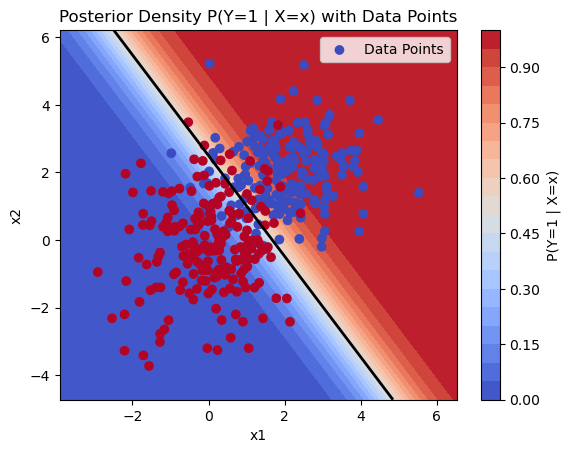

In [20]:
# Example usage
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generate data
n1, n2 = 200, 200
mu1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
mu2 = [0, 0]
cov2 = [[1, 0], [0, 2]]

X, Y = generate_data(n1, n2, mu1, cov1, mu2, cov2)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Predict on test set
Y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"LDA Classification Accuracy: {accuracy:.2f}")

# Display posterior density
display_posterior_density(X, Y, lda)

Nous remarquons la frontière linéaire liée à l'égalité des matrices de covariance


## Analyse discriminante quadratique
Les matrices de variances-covariances sont laissées libres et la frontière est une hyperbole (proche de la frontière obtenu par le classifieur de Bayes naïf)

QDA Classification Accuracy: 0.93


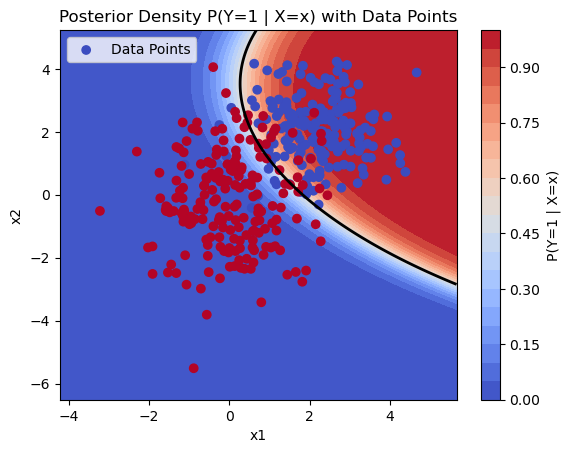

In [21]:
# Example usage with QDA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generate data
n1, n2 = 200, 200
mu1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
mu2 = [0, 0]
cov2 = [[1, 0], [0, 2]]

X, Y = generate_data(n1, n2, mu1, cov1, mu2, cov2)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)

# Predict on test set
Y_pred = qda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"QDA Classification Accuracy: {accuracy:.2f}")

# Display posterior density
display_posterior_density(X, Y, qda)


## Les plus proches voisins

KNN Classification Accuracy: 0.85


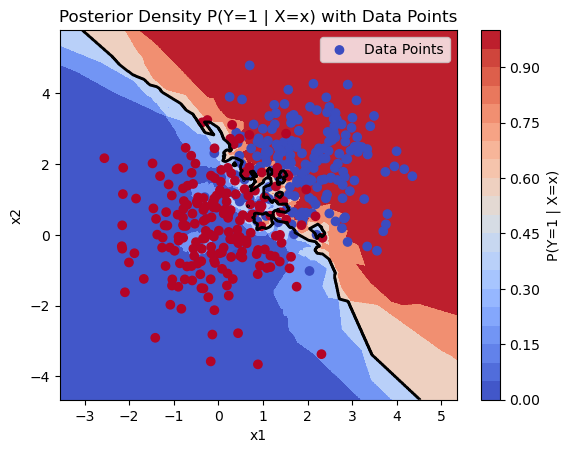

In [22]:
# Example usage with KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate data
n1, n2 = 200, 200
mu1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
mu2 = [0, 0]
cov2 = [[1, 0], [0, 2]]

X, Y = generate_data(n1, n2, mu1, cov1, mu2, cov2)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_train, Y_train)

# Predict on test set
Y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"KNN Classification Accuracy: {accuracy:.2f}")

# Display posterior density
display_posterior_density(X, Y, knn)


## La régression logistique

Logistic Regression Classification Accuracy: 0.88


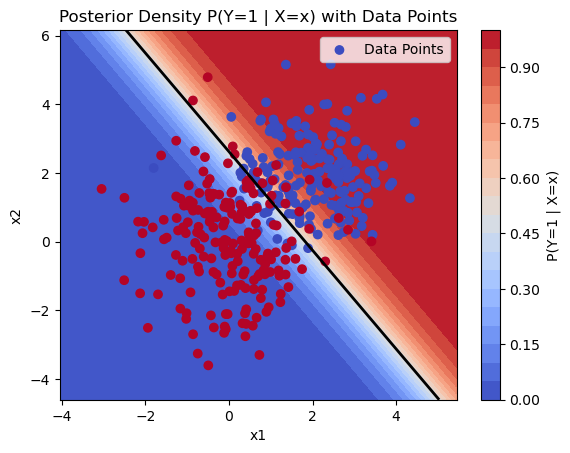

In [23]:
# Example usage with Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate data
n1, n2 = 200, 200
mu1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
mu2 = [0, 0]
cov2 = [[1, 0], [0, 2]]

X, Y = generate_data(n1, n2, mu1, cov1, mu2, cov2)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Predict on test set
Y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Classification Accuracy: {accuracy:.2f}")

# Display posterior density
display_posterior_density(X, Y, log_reg)


## Comparaison des méthodes par AUC et erreur de classification

Remarquons les grandes différences entre ensemble d'apprentissage et test. 

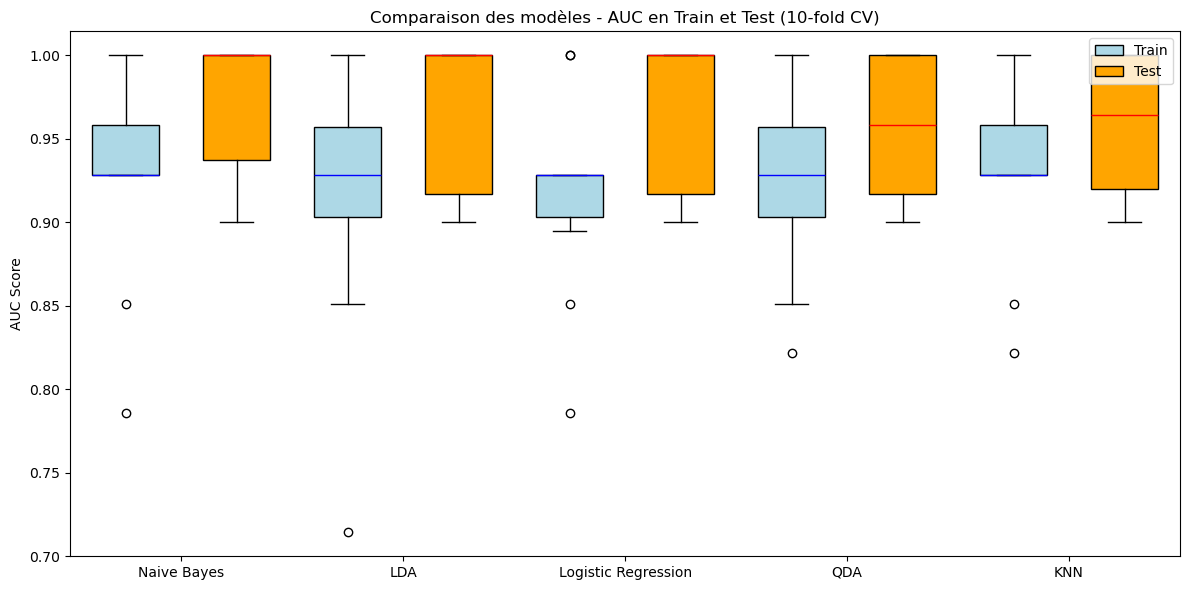

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.datasets import make_classification

# Générer des données simulées
n1, n2 = 200, 200
X, Y = make_classification(n_samples=n1 + n2, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split les données en train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialiser les modèles
models = {
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Fonction pour calculer les AUC avec validation croisée (10-fold)
def calculate_auc_cv(model, X_train, Y_train, X_test, Y_test):
    scorer = make_scorer(roc_auc_score)
    train_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring=scorer)
    test_scores = cross_val_score(model, X_test, Y_test, cv=10, scoring=scorer)
    return train_scores, test_scores

# Stocker les résultats des AUC
results_train = []
results_test = []
model_names = []

# Calculer l'AUC pour chaque modèle
for name, model in models.items():
    train_auc, test_auc = calculate_auc_cv(model, X_train, Y_train, X_test, Y_test)
    results_train.append(train_auc)
    results_test.append(test_auc)
    model_names.append(name)

# Créer les boxplots pour visualiser les AUC en train et en test
fig, ax = plt.subplots(figsize=(12, 6))

# Préparer les données pour afficher les boxplots côte à côte
positions_train = np.arange(1, len(models) * 2, 2)  # Positions pour les boxplots en train
positions_test = np.arange(2, len(models) * 2 + 1, 2)  # Positions pour les boxplots en test

# Boxplot pour l'AUC sur les données de train (en bleu)
bp_train = ax.boxplot(results_train, positions=positions_train, widths=0.6, patch_artist=True,
                      boxprops=dict(facecolor="lightblue"), medianprops=dict(color="blue"))

# Boxplot pour l'AUC sur les données de test (en orange)
bp_test = ax.boxplot(results_test, positions=positions_test, widths=0.6, patch_artist=True,
                     boxprops=dict(facecolor="orange"), medianprops=dict(color="red"))

# Ajouter une légende pour les boxplots
ax.legend([bp_train["boxes"][0], bp_test["boxes"][0]], ['Train', 'Test'], loc='upper right')

# Ajuster les labels et le titre
ax.set_xticks(np.arange(1.5, len(models) * 2, 2))
ax.set_xticklabels(model_names)
ax.set_title("Comparaison des modèles - AUC en Train et Test (10-fold CV)")
ax.set_ylabel("AUC Score")

plt.tight_layout()
plt.show()


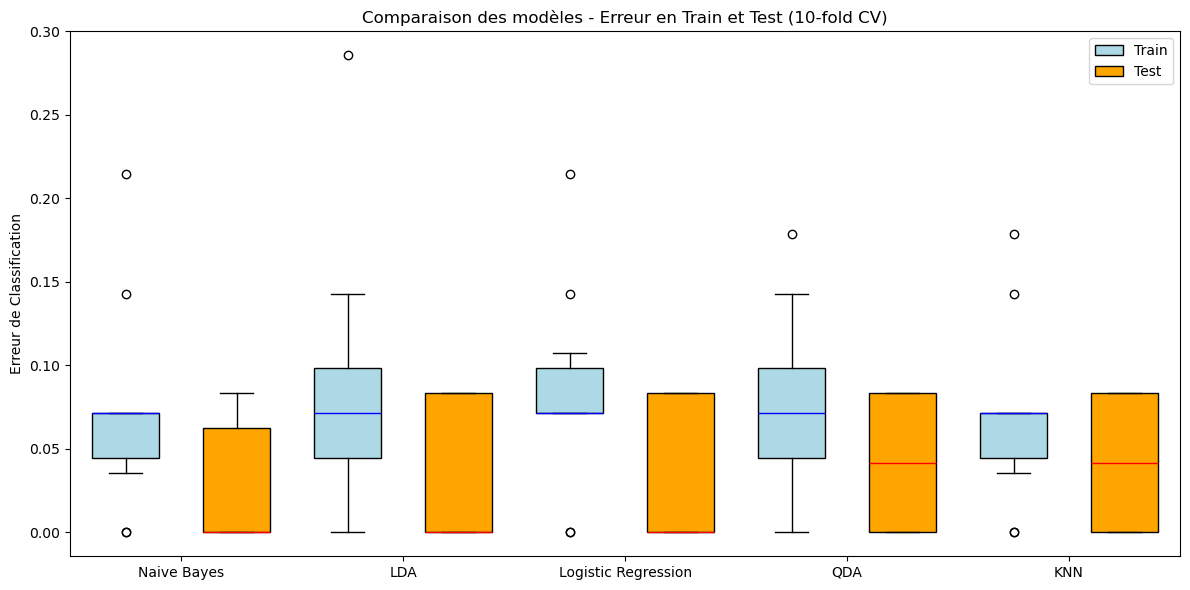

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification

# Générer des données simulées
n1, n2 = 200, 200
X, Y = make_classification(n_samples=n1 + n2, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split les données en train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialiser les modèles
models = {
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Fonction pour calculer les erreurs avec validation croisée (10-fold)
def calculate_error_cv(model, X_train, Y_train, X_test, Y_test):
    scorer = make_scorer(lambda y_true, y_pred: 1 - np.mean(y_true == y_pred))  # Calculer l'erreur
    train_errors = cross_val_score(model, X_train, Y_train, cv=10, scoring=scorer)
    test_errors = cross_val_score(model, X_test, Y_test, cv=10, scoring=scorer)
    return train_errors, test_errors

# Stocker les résultats des erreurs
results_train = []
results_test = []
model_names = []

# Calculer l'erreur pour chaque modèle
for name, model in models.items():
    train_error, test_error = calculate_error_cv(model, X_train, Y_train, X_test, Y_test)
    results_train.append(train_error)
    results_test.append(test_error)
    model_names.append(name)

# Créer les boxplots pour visualiser les erreurs en train et en test
fig, ax = plt.subplots(figsize=(12, 6))

# Préparer les données pour afficher les boxplots côte à côte
positions_train = np.arange(1, len(models) * 2, 2)  # Positions pour les boxplots en train
positions_test = np.arange(2, len(models) * 2 + 1, 2)  # Positions pour les boxplots en test

# Boxplot pour l'erreur sur les données de train (en bleu)
bp_train = ax.boxplot(results_train, positions=positions_train, widths=0.6, patch_artist=True,
                      boxprops=dict(facecolor="lightblue"), medianprops=dict(color="blue"))

# Boxplot pour l'erreur sur les données de test (en orange)
bp_test = ax.boxplot(results_test, positions=positions_test, widths=0.6, patch_artist=True,
                     boxprops=dict(facecolor="orange"), medianprops=dict(color="red"))

# Ajouter une légende pour les boxplots
ax.legend([bp_train["boxes"][0], bp_test["boxes"][0]], ['Train', 'Test'], loc='upper right')

# Ajuster les labels et le titre
ax.set_xticks(np.arange(1.5, len(models) * 2, 2))
ax.set_xticklabels(model_names)
ax.set_title("Comparaison des modèles - Erreur en Train et Test (10-fold CV)")
ax.set_ylabel("Erreur de Classification")

plt.tight_layout()
plt.show()
